## 1) Data Understanding
### 1.1) Load the dataset

In [1]:
# We can suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Uploading the dataset
df = pd.read_csv("healthcare_dataset.csv")

In [4]:
# Showing the data
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


### 1.2) Describe the data
#### Characterisation of the data set

In [5]:
# Data Format
# Summary statistics for numerical columns
df.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,7.482200,4.485400
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,2.281562,2.852405
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,7.000000,4.000000
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,9.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


In [6]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,PhysicalActivity,IncomeLevel,StressLevel,HealthIns,Disease
count,5000,5000,5000,5000,3742
unique,3,3,3,2,3
top,Medium,Low,Low,Yes,Disease_B
freq,1748,1681,1696,2506,1258


In [7]:
# Number of Records
df.shape

(5000, 15)

In [8]:
# See all the columns
df.columns

Index(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin',
       'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime',
       'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns',
       'Disease'],
      dtype='object')

In [9]:
# Identifying categorical and numerical columns.
df.dtypes

Age                      int64
BMI                    float64
BloodPressure          float64
Cholesterol            float64
Glucose                  int64
Insulin                  int64
HeartRate                int64
Smoker                   int64
PhysicalActivity        object
SleepTime                int64
MedicalHistoryScore      int64
IncomeLevel             object
StressLevel             object
HealthIns               object
Disease                 object
dtype: object

In [10]:
# Check missing values
df.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [11]:
# Document any quality issues: Check duplicated rows
df.duplicated().sum()

0

In [12]:
# Check for inconsistent data
# Check if numerical columns have negative values (assuming it's not applicable)
negative_values = (df.select_dtypes(include=['number']) < 0).sum()

In [13]:
negative_values

Age                    0
BMI                    0
BloodPressure          0
Cholesterol            0
Glucose                0
Insulin                0
HeartRate              0
Smoker                 0
SleepTime              0
MedicalHistoryScore    0
dtype: int64

## 2) Data Preparation
### 2.1) Clean data

In [14]:
df["BloodPressure"].unique()

array([ 88., 152., 106.,  96.,  nan, 124.,  87., 159.,  97., 112.,  80.,
       155.,  85., 120., 134.,  84., 138., 128., 161., 144., 162., 133.,
       140.,  82., 104., 148., 119., 129., 174., 136.,  95., 117.,  86.,
       157., 132., 142., 168., 111., 101., 131., 143., 170.,  92., 151.,
       135.,  91., 178., 165., 108., 118., 179., 177., 125., 146.,  93.,
       102., 173.,  89., 156., 160., 166.,  81., 175., 122.,  83., 167.,
        98., 164., 145., 116., 158., 126., 115., 105., 110., 176., 150.,
       114.,  94., 172., 109., 154., 139., 153., 171., 169., 163., 147.,
       149., 130., 127., 107., 103., 123., 121., 141., 100.,  90.,  99.,
       113., 137.])

In [15]:
# Replacing NaNs using Median/Mean of the column 
df["BMI_mean"]=df["BMI"].fillna(int(df["BMI"].mean()))

In [16]:
# Replacing NaNs using Median/Mean of the column 
df["BloodPressure_mean"]=df["BloodPressure"].fillna(int(df["BloodPressure"].mean()))

In [17]:
# Replacing NaNs using Median/Mean of the column 
df["Cholesterol_mean"]=df["Cholesterol"].fillna(int(df["Cholesterol"].mean()))

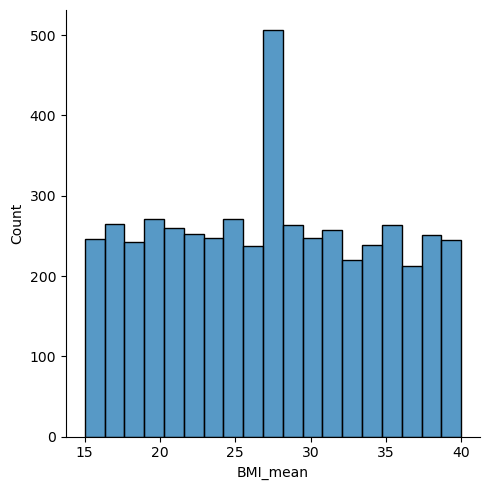

In [18]:
sns.displot(df["BMI_mean"])

In [19]:
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease,BMI_mean,BloodPressure_mean,Cholesterol_mean
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B,27.577099,88.0,108.0
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A,26.233744,88.0,252.0
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C,29.646620,152.0,141.0
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C,30.619597,106.0,273.0
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B,16.794395,96.0,172.0


In [20]:
# Remove columns
df_dropped = df.drop(['BMI', 'BloodPressure', 'Cholesterol'], axis=1, inplace=True)

In [21]:
df.head()

,Age,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease,BMI_mean,BloodPressure_mean,Cholesterol_mean
0,56,92,171,75,0,Medium,9,5,High,Low,No,Disease_B,27.577099,88.0,108.0
1,69,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A,26.233744,88.0,252.0
2,46,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C,29.646620,152.0,141.0
3,32,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C,30.619597,106.0,273.0
4,60,173,30,99,1,Low,7,3,High,Medium,No,Disease_B,16.794395,96.0,172.0


In [22]:
# I want to see here if I am loosing data.
df.shape

(5000, 15)

In [23]:
# Checking again the missing values
df.isnull().sum()

Age                       0
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
BMI_mean                  0
BloodPressure_mean        0
Cholesterol_mean          0
dtype: int64

In [24]:
# Handling missing values using replace:
new_df = df.replace({None: 'No_Disease'})

In [25]:
new_df

,Age,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease,BMI_mean,BloodPressure_mean,Cholesterol_mean
0,56,92,171,75,0,Medium,9,5,High,Low,No,Disease_B,27.577099,88.0,108.0
1,69,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A,26.233744,88.0,252.0
2,46,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C,29.646620,152.0,141.0
3,32,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C,30.619597,106.0,273.0
4,60,173,30,99,1,Low,7,3,High,Medium,No,Disease_B,16.794395,96.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,107,248,90,1,High,10,9,High,High,No,Disease_B,32.859689,174.0,140.0
4996,39,180,200,98,1,High,8,5,High,Low,No,Disease_C,37.916078,113.0,184.0
4997,48,82,77,61,1,High,4,1,Medium,High,Yes,Disease_C,32.637416,143.0,188.0
4998,34,76,117,71,1,High,4,2,Low,Medium,No,No_Disease,31.794482,108.0,141.0


In [26]:
new_df.isnull().sum()

Age                    0
Glucose                0
Insulin                0
HeartRate              0
Smoker                 0
PhysicalActivity       0
SleepTime              0
MedicalHistoryScore    0
IncomeLevel            0
StressLevel            0
HealthIns              0
Disease                0
BMI_mean               0
BloodPressure_mean     0
Cholesterol_mean       0
dtype: int64

In [27]:
new_df.head(50)

,Age,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease,BMI_mean,BloodPressure_mean,Cholesterol_mean
0,56,92,171,75,0,Medium,9,5,High,Low,No,Disease_B,27.577099,88.0,108.0
1,69,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A,26.233744,88.0,252.0
2,46,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C,29.646620,152.0,141.0
3,32,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C,30.619597,106.0,273.0
4,60,173,30,99,1,Low,7,3,High,Medium,No,Disease_B,16.794395,96.0,172.0
5,25,81,255,168,0,High,11,3,High,Low,Yes,No_Disease,32.065431,129.0,183.0
6,78,120,244,80,0,Medium,7,1,Low,High,Yes,Disease_C,21.048292,124.0,199.0
7,38,75,32,124,1,Medium,9,0,Low,Low,Yes,Disease_B,32.848816,87.0,120.0
8,56,160,161,69,1,Low,4,7,Low,Low,Yes,Disease_C,35.563370,159.0,249.0
9,75,138,258,82,0,Low,10,5,Low,High,Yes,Disease_C,35.098963,97.0,256.0


In [28]:
# Apply encoding, scaling and feature engineering as and if required, 
# detailing how and why you used these techniques and the rationale for your decisions.
from sklearn.preprocessing import LabelEncoder

# Select categorical columns to be label encoded
categorical_cols = ['PhysicalActivity', 'IncomeLevel', 'StressLevel', 'HealthIns',
                    'Disease']

In [29]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    new_df[col] = label_encoder.fit_transform(new_df[col])

In [30]:
# Display the updated DataFrame
new_df.head()

,Age,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease,BMI_mean,BloodPressure_mean,Cholesterol_mean
0,56,92,171,75,0,2,9,5,0,1,0,1,27.577099,88.0,108.0
1,69,102,179,71,0,0,9,3,0,2,1,0,26.233744,88.0,252.0
2,46,89,198,90,1,1,5,5,2,2,0,2,29.646620,152.0,141.0
3,32,159,222,64,1,2,7,0,2,0,0,2,30.619597,106.0,273.0
4,60,173,30,99,1,1,7,3,0,2,0,1,16.794395,96.0,172.0


In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   Glucose              5000 non-null   int64  
 2   Insulin              5000 non-null   int64  
 3   HeartRate            5000 non-null   int64  
 4   Smoker               5000 non-null   int64  
 5   PhysicalActivity     5000 non-null   int32  
 6   SleepTime            5000 non-null   int64  
 7   MedicalHistoryScore  5000 non-null   int64  
 8   IncomeLevel          5000 non-null   int32  
 9   StressLevel          5000 non-null   int32  
 10  HealthIns            5000 non-null   int32  
 11  Disease              5000 non-null   int32  
 12  BMI_mean             5000 non-null   float64
 13  BloodPressure_mean   5000 non-null   float64
 14  Cholesterol_mean     5000 non-null   float64
dtypes: float64(3), int32(5), int64(7)
memo

In [32]:
# The intention now is organize all columns in Numerical variables.
new_df['PhysicalActivity'] = new_df['PhysicalActivity'].astype('int64')
new_df['StressLevel'] = new_df['StressLevel'].astype('int64')
new_df['HealthIns'] = new_df['HealthIns'].astype('int64')
new_df['Disease'] = new_df['Disease'].astype('int64')

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   Glucose              5000 non-null   int64  
 2   Insulin              5000 non-null   int64  
 3   HeartRate            5000 non-null   int64  
 4   Smoker               5000 non-null   int64  
 5   PhysicalActivity     5000 non-null   int64  
 6   SleepTime            5000 non-null   int64  
 7   MedicalHistoryScore  5000 non-null   int64  
 8   IncomeLevel          5000 non-null   int32  
 9   StressLevel          5000 non-null   int64  
 10  HealthIns            5000 non-null   int64  
 11  Disease              5000 non-null   int64  
 12  BMI_mean             5000 non-null   float64
 13  BloodPressure_mean   5000 non-null   float64
 14  Cholesterol_mean     5000 non-null   float64
dtypes: float64(3), int32(1), int64(11)
mem

### 2.2) Exploratory Data Analysis (EDA)
Data Exploration: Perform exploratory data analysis (EDA) to understand the distribution and characteristics of variables

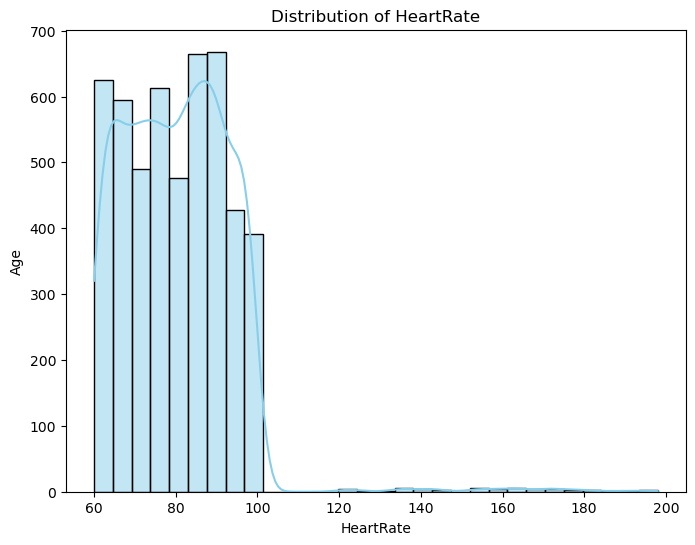

In [34]:
# Histogram of Heart Rate
plt.figure(figsize=(8, 6))
sns.histplot(new_df['HeartRate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of HeartRate')
plt.xlabel('HeartRate')
plt.ylabel('Age')
plt.show()

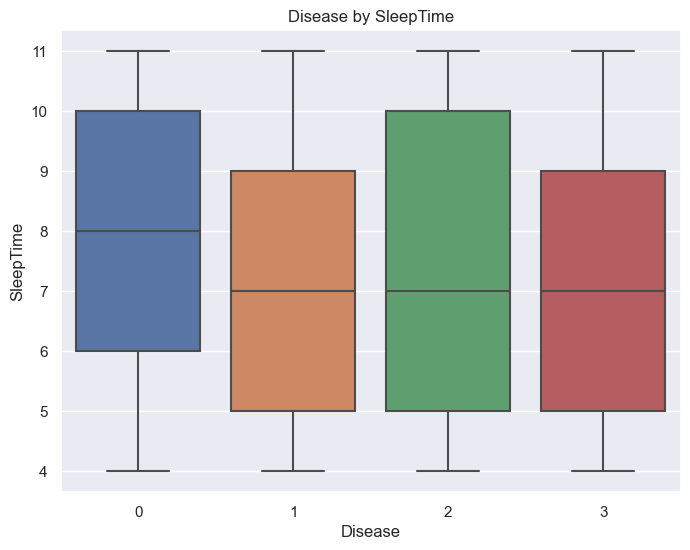

In [69]:
# Box plot of Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='Disease', y='SleepTime', data=new_df)
plt.title('Disease by SleepTime')
plt.xlabel('Disease')
plt.ylabel('SleepTime')
plt.show()

## 3) Implementing PCA

Principal Component Analysis (PCA) is a method to simplify complex data by finding the most important aspects and discarding the less important ones. It works by transforming high-dimensional data into a lower-dimensional space while keeping the most valuable information. This helps to reduce the complexity of the data and makes it easier to analyze.

In [36]:
# Load libraries to use the PCA model:
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set()

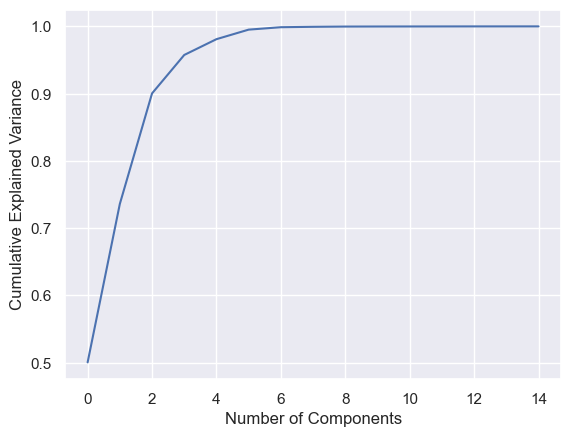

In [37]:
# Fit PCA to the data and transform the data

df_no_label = new_df.drop(new_df["Disease"]) # Drop the target column if it exists

pca = PCA().fit(df_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance');

In [38]:
# Using PCA to reduce the dimension of the dataset
pca = PCA(4)
projected = pca.fit_transform(df_no_label)

In [39]:
projected.shape

(4996, 4)

In [40]:
# Giving new column`s name
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4'])

In [41]:
df_pca.head()

,C1,C2,C3,C4
0,-118.079394,-25.955930,32.756094,32.539646
1,110.076978,-19.665261,-51.796598,1.285112
2,97.888096,-1.233932,-14.167430,6.497325
3,-112.834694,-83.263960,-62.179849,41.177352
4,13.955555,50.716895,20.411384,-28.932320


In [42]:
# Including the Target variable
df_pca["Disease"] = new_df["Disease"]

In [43]:
df_pca.head(10)

,C1,C2,C3,C4,Disease
0,-118.079394,-25.955930,32.756094,32.539646,1
1,110.076978,-19.665261,-51.796598,1.285112,0
2,97.888096,-1.233932,-14.167430,6.497325,2
3,-112.834694,-83.263960,-62.179849,41.177352,2
4,13.955555,50.716895,20.411384,-28.932320,1
5,111.004648,56.541274,1.235416,33.819255,3
6,-83.492978,-34.888875,53.642579,16.988023,2
7,124.289471,-25.127624,52.219442,50.793418,1
8,104.193206,-37.108974,48.314771,-24.333527,2
9,113.354655,-36.967986,-1.511006,45.735071,2


In [44]:
df_array = df_pca.values

In [45]:
# Standardize the data
from sklearn.model_selection import train_test_split

X = df_array[:,0:4]
y = df_array[:,4]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# MACHINE LEARNING
Machine learning approach (supervised/ Unsupervised) for the provided data set.

In [46]:
# Importing random forest classifier from sklearn library
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [47]:
# Defined features X and target variable Y before.

In [48]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
# Making predictions
predictions = rfc.predict(X_test)

In [50]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [51]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.24      0.25      0.24       366
         1.0       0.27      0.27      0.27       373
         2.0       0.28      0.27      0.27       378
         3.0       0.25      0.24      0.25       382

    accuracy                           0.26      1499
   macro avg       0.26      0.26      0.26      1499
weighted avg       0.26      0.26      0.26      1499



In [52]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 90  89  93  94]
 [103 102  82  86]
 [ 91  89 102  96]
 [ 98  98  93  93]]


In [53]:
print(accuracy_score(y_test,predictions))

0.2581721147431621


### 4) Hyperparameter Tuning

In [54]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [55]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.246090,0.040372,0.011932,0.004220,2,{'max_depth': 2},0.232857,0.225714,0.238913,0.230329,0.218884,0.229339,0.006745,4
1,0.492941,0.023423,0.011306,0.003111,7,{'max_depth': 7},0.238571,0.222857,0.241774,0.238913,0.218884,0.232200,0.009401,3
2,0.763703,0.025521,0.012633,0.001123,12,{'max_depth': 12},0.234286,0.227143,0.246066,0.244635,0.248927,0.240211,0.008194,2
3,0.955160,0.034109,0.015531,0.001804,17,{'max_depth': 17},0.244286,0.267143,0.278970,0.246066,0.230329,0.253359,0.017389,1


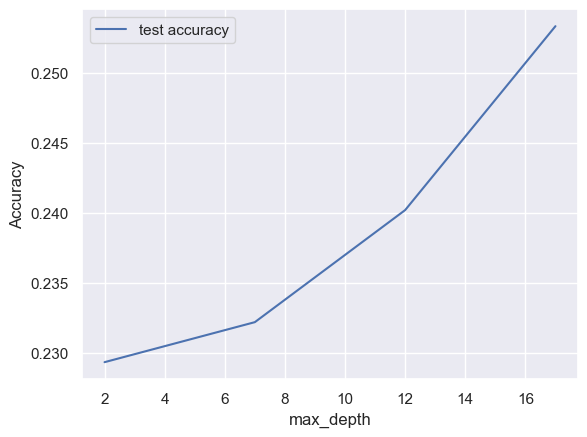

In [72]:
# plotting accuracies 
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 4.1) Grid Search to Find Optimal Hyperparameters

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [59]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.2573657049889943 using {'max_depth': 8, 'max_features': 5, 'n_estimators': 100}


### 4.2) Fitting the final model with the best parameters obtained from grid search.

In [60]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=10,
                             n_estimators=100)

In [61]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10)

In [70]:
# predict
predictions = rfc.predict(X_test)

In [63]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.23      0.27      0.25       366
         1.0       0.24      0.26      0.25       373
         2.0       0.26      0.21      0.23       378
         3.0       0.25      0.25      0.25       382

    accuracy                           0.25      1499
   macro avg       0.25      0.25      0.25      1499
weighted avg       0.25      0.25      0.25      1499



In [65]:
print(confusion_matrix(y_test,predictions))

[[ 97 102  78  89]
 [106  96  67 104]
 [114  92  80  92]
 [ 96 104  86  96]]


In [66]:
# Implement K-fold Cross-Validation
def perform_cross_validation(k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
    print(f'{k}-Fold Cross-Validation Results:')
    print(f'Accuracy Scores: {scores}')
    print(f'Mean Accuracy: {np.mean(scores)}')
    print(f'Standard Deviation: {np.std(scores)}\n')

In [67]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold
# Perform 10-fold cross-validation
perform_cross_validation(10)

# Perform 20-fold cross-validation
perform_cross_validation(20)

# Perform 30-fold cross-validation
perform_cross_validation(30)

10-Fold Cross-Validation Results:
Accuracy Scores: [0.256      0.254      0.272      0.266      0.256      0.278
 0.25851703 0.22645291 0.23046092 0.26452906]
Mean Accuracy: 0.2561959919839679
Standard Deviation: 0.01564599454276872

20-Fold Cross-Validation Results:
Accuracy Scores: [0.236      0.272      0.26       0.256      0.24       0.252
 0.22       0.232      0.304      0.3        0.276      0.256
 0.252      0.248      0.26       0.276      0.21285141 0.23293173
 0.26506024 0.25702811]
Mean Accuracy: 0.2553935742971888
Standard Deviation: 0.022827326123629747

30-Fold Cross-Validation Results:
Accuracy Scores: [0.24550898 0.21556886 0.28143713 0.25748503 0.24550898 0.26946108
 0.22155689 0.28143713 0.19760479 0.24550898 0.25149701 0.22754491
 0.24550898 0.22754491 0.2994012  0.23353293 0.28915663 0.25903614
 0.22289157 0.20481928 0.28915663 0.21686747 0.24698795 0.27710843
 0.22289157 0.24698795 0.25301205 0.21686747 0.27710843 0.26506024]
Mean Accuracy: 0.24780198638866843
St